**Part 1- Feature extraction**

In [9]:
# ! pip install opencv-python
# ! pip install imutils
# ! pip install google-colab
! pip install opencv-contrib-python



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
# from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
# from google.colab.output import eval_js
from base64 import b64decode
# from google.colab import drive
# drive.mount('/content/drive')

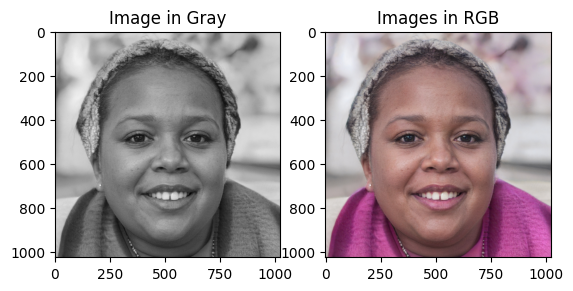

In [4]:
# Read the original image pic1 and create a regular plus a gray version of it. 
# The result should be similar to what you see in instrcutions
f = plt.figure()
f.add_subplot(1, 2, 1)

# Reading file from local storage
img_bgr = cv2.imread("Assignment4_pic1.jpg")
# convert to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# convert to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# plot original image
plt.imshow(img_gray, cmap='gray')
plt.axis("on")
plt.title("Image in Gray")

# plot grayscale image
f.add_subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title("Images in RGB")
plt.show()

In [5]:
# store and write gray image locally
cv2.imwrite("pic1_gray.jpg", img_gray)

True

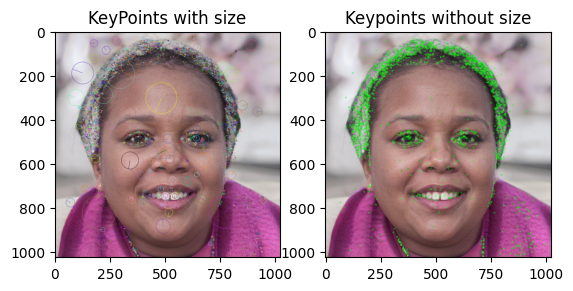

In [4]:
#a- SIFT
sift = cv2.SIFT_create()
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute(img_gray, None)
keypoints_without_size = np.copy(img_rgb)
# You need some more codes

# Draw keypoints with size
keypoints_with_size = np.copy(img_gray)

# Draw the result here
result1 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_without_size, color = (0, 255, 0))

f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(result1)
plt.title("KeyPoints with size")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(result2)
plt.title("Keypoints without size")
plt.show()

In [ ]:
# Explain your understanding here

Function which draws the small circles on the locations of keypoints.  
When passing cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to it, it will draw a circle with size of keypoint and it will even show its orientation.

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  7051
Threshold:  10
nonmaxSuppression:  False
neighborhood:  2
Total Keypoints with nonmaxSuppression:  27512


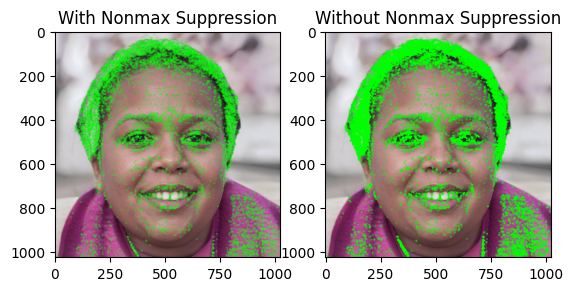

In [15]:
# b- FAST
fast_w_nonmax = cv2.FastFeatureDetector_create(nonmaxSuppression=True) 
fast_wo_nonmax = cv2.FastFeatureDetector_create(nonmaxSuppression=False) 

# Find detect and compute function and apply it on top of fast
# find the keypoints on image (grayscale)
keypoints_with_nonmax = fast_w_nonmax.detect(img_gray, None)
keypoints_without_nonmax = fast_wo_nonmax.detect(img_gray, None)

# Copy of image to draw keypoints on image
image_with_nonmax = np.copy(img_rgb)
image_nonmax = cv2.drawKeypoints(image_with_nonmax, keypoints_with_nonmax, None, color = (0, 255, 0))

image_wo_nonmax = np.copy(img_rgb)
image_wo_nonmax = cv2.drawKeypoints(image_wo_nonmax, keypoints_without_nonmax, None, color = (0, 255, 0))

# Print all default params
print("Threshold: ", fast_w_nonmax.getThreshold())
print("nonmaxSuppression: ", fast_w_nonmax.getNonmaxSuppression())
print("neighborhood: ", fast_w_nonmax.getType())
print("Total Keypoints with nonmaxSuppression: ", len(keypoints_with_nonmax))

# Print all default params
print("Threshold: ", fast_wo_nonmax.getThreshold())
print("nonmaxSuppression: ", fast_wo_nonmax.getNonmaxSuppression())
print("neighborhood: ", fast_wo_nonmax.getType())
print("Total Keypoints with nonmaxSuppression: ", len(keypoints_without_nonmax))

# Draw the result
# Use above approach to create result 1 and result 2 and draw them
f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(image_nonmax)
plt.title("With Nonmax Suppression")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(image_wo_nonmax)
plt.title("Without Nonmax Suppression")
plt.show()


In [16]:
# Explain your understanding here:

The nonmaxSuppression parameter is used to remove the keypoints that are close to each other.  
This allows for fewer keypoints and bounding boxes to be drawn on the image.

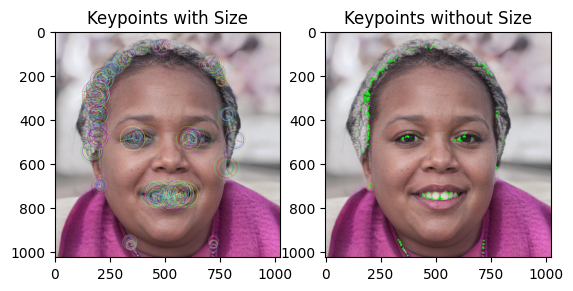

In [29]:
# c- ORB
orb = cv2.ORB_create()
# gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
original_keypoints, original_descriptor = orb.detectAndCompute(img_gray, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img_gray, None)

keypoints_without_size = np.copy(img_rgb)
img_wo_kp = cv2.drawKeypoints(keypoints_without_size, original_keypoints, None, color = (0, 255, 0))

keypoints_with_size = np.copy(img_rgb)
img_w_kp = cv2.drawKeypoints(keypoints_with_size, query_keypoints, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Draw the result
f = plt.figure()
# Plot the result
f.add_subplot(1, 2, 1)
plt.imshow(img_w_kp)
plt.title("Keypoints with Size")
plt.axis("on")

f.add_subplot(1, 2, 2)
plt.imshow(img_wo_kp)
plt.title("Keypoints without Size")
plt.show()

In [ ]:
# Explain your understanding here:


The number of matching keypoints between the original and the query image is 500



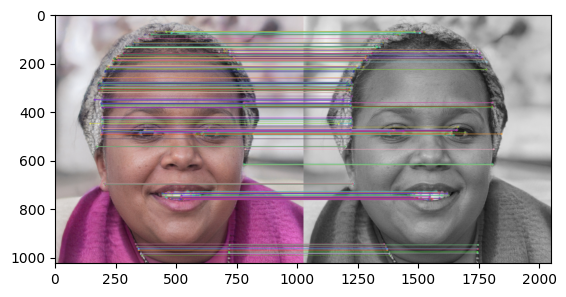

In [30]:
#d- Finding the matching points
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(img_rgb, original_keypoints, img_gray, query_keypoints, matches, img_gray, flags = 2)
plt.imshow(result)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

In [ ]:
# Explain your understanding here. What is the goal of this matching point?


**Part 2- Face recognition**

In [5]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/haarcascade_eye.xml")

img = cv2.imread("/content/Assignment4_pic2.jpg")
gray = #Cretae the gray version of image using openCV
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(img)

SyntaxError: invalid syntax (443709511.py, line 5)

In [ ]:
#b- Working on webcam
#Function to activate your laptop cam. This function is comp;ete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = 

#Show the read image
image = #read the image and show it here


#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected


**Part 3- Parameter detection**

In [ ]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/apple.jpg')

#convert BGR to HSV
imgHSV= 
# Show this image

# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))
    
cv2_imshow(maskClose)
cv2_imshow(maskOpen)
cv2_imshow(mask)
cv2_imshow(img)



In [ ]:
print( 'There were ',#???# ,' apples in this picture') #Print number of apples